## Shopify Data Science Intern Challenge 2021

### Question 1 Answers (Summary)
<br>

**Question 1a**

The AOV of $3145.13 is calculated from the dataset without consideration for orders that seem erroneous. There are large transactions that are possibly duplicates, and unrealisticly high prices suggesting inaccurate data entries. Those orders are significantly inflating the AOV.

A better way to evaluate this data would be to use a different measure of center that would be less affected by the high values that are currently driving up the AOV. In this case, the *median* would be a good alternative. 

<br>

**Question 1b** 

We can use the *median* as a metric for this data set as it is a more robust measure of center that is not going to be easily affected by outliers/extreme values.

<br>

**Question 1c**

Median order amount is $284.0


### Question 1 Answers (Full)

**Question 1a**

Let's take a look at the dataset

In [1]:
# save the data as a csv file
import pandas as pd
sneaker_sales = pd.read_csv('Intern Challenge Data Set.csv')

sneaker_sales.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The naively calculated AOV of $3145.13 is the average of the order_amount.

Let's see a visual representation of the sales with each point as one order...

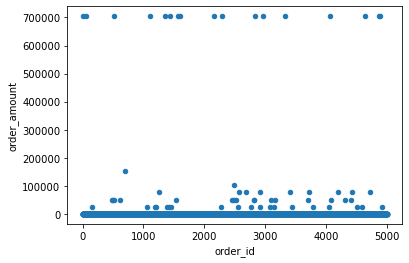

In [2]:
sneaker_sales.plot.scatter(x='order_id', y='order_amount')

From the plot above, it looks like most of the sales are under $100,000 and the AOV is driven up by a few unreasonably high purchases. 

Let's look into the top transactions...

In [3]:
sneaker_sales.sort_values(['total_items'], ascending=[False])[0:20]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2095,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2116,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2094,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
2076,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2078,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2108,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2122,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2081,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2107,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2110,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00


Sorting by total_items, there is an evident jump in values for the top 17 transactions. Compared to 2000 items per order for the top 17, all other orders have an total_items of 8 or less. 
Looking at other columns, we find that: 
- they are purchased by the same user_id 607
- each order is exactly 2000 sneakers from shop_id 42 for a total of $704000
    
It seems more plausible that these values were accidentally multiplied by 1000 such that each order is actually 2 sneakers for a total of $704. Since we cannot determine whether it was a mistake or not, we will keep these entries. 

Let's sort these 17 transactions by the time they were created at...

In [4]:
user_id607 = sneaker_sales[sneaker_sales["user_id"] == 607]
user_id607.sort_values(["created_at"])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2081,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2122,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2078,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2076,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2103,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2090,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2101,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2087,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2095,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2094,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


Ordering by time, it is evident that each purchase is made precicely at 4am up to 3 times a day, all with credit cards. 
This suggests that the transactions are duplicate entries. However, since the order_ids are different, it seems like user_id 607 is running a script to make fast bulk purchases. 

Let's now look at the top transactions sorting by price per item...


In [5]:
unit_price = sneaker_sales[sneaker_sales["total_items"] == 1]
unit_price.sort_values(['order_amount'], ascending = [False])[0:25]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3875,1420,78,912,25725,1,cash,2017-03-30 12:23:43
3899,3781,78,889,25725,1,cash,2017-03-11 21:14:50
3871,1194,78,944,25725,1,debit,2017-03-16 16:38:26
3874,1385,78,867,25725,1,cash,2017-03-17 16:38:06
3872,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
3909,4919,78,823,25725,1,cash,2017-03-15 13:26:46
3907,4585,78,997,25725,1,cash,2017-03-25 21:48:44
3906,4506,78,866,25725,1,debit,2017-03-22 22:06:01
3864,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
3900,4041,78,852,25725,1,cash,2017-03-02 14:31:12


Sorting by unit price, the top 19 transactions stand out from the rest. They are all from shop_id 78 selling for $25725 each, excessively expensive compared to the next priciest item at 352.

This high price point is unusual for an average pair of sneakers, and is likely due to an error in inputting or computing the values.


**Question 1c**

Compute the Median:

In [6]:
sneaker_sales["order_amount"].median()

284.0


### Question 2 Answers
<br>

**Question 2a**: How many orders were shipped by Speedy Express in total?
  
  Answer: *54*
  
      SELECT COUNT (*)
      FROM ORDERS o, SHIPPERS s
      WHERE o.ShipperID = s.ShipperID 
        AND ShipperName = 'Speedy Express';

<br>

**Question 2b**: What is the last name of the employee with the most orders?

  Answer: *Peacock*
  
      SELECT LastName
      FROM EMPLOYEES e, ORDERS o
      WHERE e.EmployeeID = o.EmployeeID 
      GROUP BY e.LastName
      ORDER BY COUNT(*) DESC
      LIMIT 1 

<br>

**Question 2c**: What product was ordered* the most by customers in Germany?
  
  Answer: *Boston Crab Meat* 
          
      SELECT ProductName
      FROM Products p, OrderDetails od, Orders o, Customers c
      WHERE p.ProductID = od.ProductID 
        AND od.OrderID = o.OrderID 
        AND o.CustomerID = c.CustomerID
        AND c.Country = "Germany"
      GROUP BY p.ProductID
      ORDER BY SUM(Quantity) DESC
      LIMIT 1

***Note**: This question could also be asking about which product had the most orders (i.e. not unit sales, but separate orders), in which case* SUM(Quantity) *should be replaced by* COUNT(p.ProductID) *for an answer of Gorgonzola Telino*
